In [18]:
import pandas as pd
import numpy as np
import os

## Loading and preparing data for analysis

In [3]:
os.listdir(r'C:/Users/Admin/Desktop/ANALYSE/work_test/data_frame')

['Canada.csv',
 'Germany.csv',
 'Great_Britain.csv',
 'India.csv',
 'Japan.csv',
 'Mexico.csv',
 'Russia.csv',
 'South_Korea.csv',
 'United_States.csv']

In [4]:
path = r'C:/Users/Admin/Desktop/ANALYSE/work_test/data_frame'

In [5]:
os.walk(path)

<generator object _walk at 0x000002258C301430>

In [6]:
list(os.walk(path))

[('C:/Users/Admin/Desktop/ANALYSE/work_test/data_frame',
  [],
  ['Canada.csv',
   'Germany.csv',
   'Great_Britain.csv',
   'India.csv',
   'Japan.csv',
   'Mexico.csv',
   'Russia.csv',
   'South_Korea.csv',
   'United_States.csv'])]

In [7]:
path = r'C:/Users/Admin/Desktop/ANALYSE/work_test/data_frame'

In [8]:
df = pd.DataFrame()

for current_path, dirs, files in os.walk(path):
    for file in files:
        data_path = f'{current_path}/{file}'
        temp_df = pd.read_csv(data_path,encoding='ISO-8859-1')
        country = os.path.splitext(file)[0]
        temp_df['country'] = country
        df = pd.concat((df,temp_df), axis = 0)
        print(df.shape)

(40881, 17)
(81721, 17)
(120637, 17)
(157989, 17)
(178512, 17)
(218963, 17)
(259702, 17)
(294269, 17)
(335218, 17)


In [9]:
 df['country'].value_counts()

United_States    40949
Canada           40881
Germany          40840
Russia           40739
Mexico           40451
Great_Britain    38916
India            37352
South_Korea      34567
Japan            20523
Name: country, dtype: int64

In [14]:
df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               16566
country                       0
dtype: int64

In [15]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
country                   object
dtype: object

In [19]:
df['category_id']=df['category_id'].replace ({2:'Autos & Vehicles',1:'Film & Animation',
                  10:'Music',15:'Pets & Animals',17:'Sports',
                 19:'Travel & Events',20:'Gaming',22:'People & Blogs',
                 23:'Comedy',24:'Entertainment',25:'News & Politics',
                 26:'Howto & Style',27:'Education',28:'Science & Technology',
                  29:'Nonprofits & Activism',43:'Shows'})

I merged 7 files into 1, added a column 'country', and changed the category names. I found that there is the least amount of data available for Japan. Unfortunately, I could not find the definition for categories 33 and 44. The only column with missing data is the description, which is not important for our analysis.

## Task 1

Relationship between country and popular categories.

In [100]:
countries = ['Germany', 'India']

views = df[df['country'].isin(countries)].groupby(['category_id','country'])['views'].sum().to_frame('count').sort_values('count', ascending=False)

Text(0.5, 1.0, 'Top 5 Categories by Germany India and Japan')

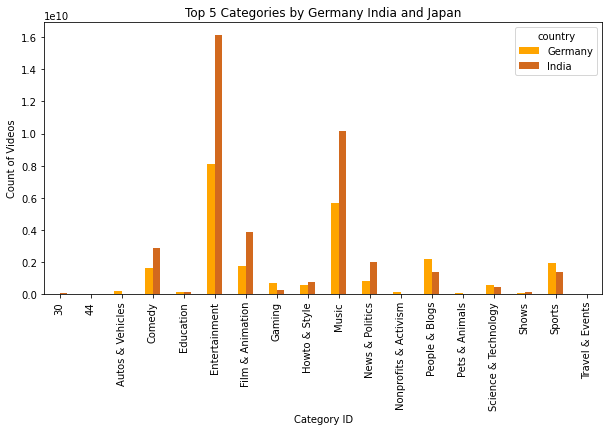

In [105]:
pivot_df = views.pivot_table(index='category_id', columns='country', values='count')

my_colors = ['orange','chocolate']
pivot_df.plot(kind='bar', figsize=(10,5), color=my_colors)

plt.xlabel('Category ID')
plt.ylabel('Count of Videos')
plt.title('Top 5 Categories by Germany India and Japan')

In [110]:
japan = df[df['country'] == 'Japan']

Text(0, 0.5, 'Count')

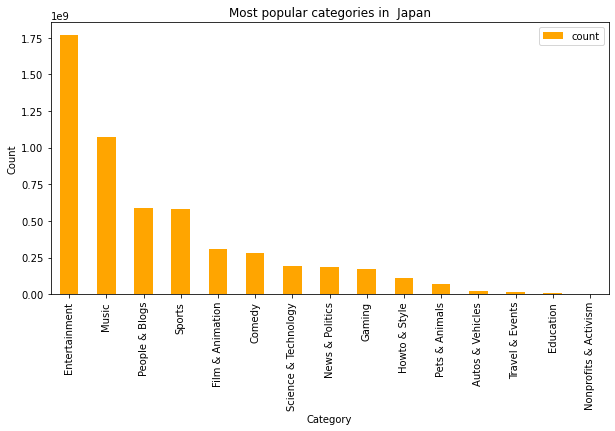

In [113]:
jp_videos = japan.groupby('category_id')['views'].sum().to_frame('count').sort_values('count',ascending = False)
ax = jp_videos.plot(kind='bar',title='Most popular categories in  Japan',color='orange',figsize=(10,5))
ax.set_xlabel('Category')
ax.set_ylabel('Count')

In [112]:
japan[japan['channel_title']=='SpaceX'].groupby('channel_title')['views'].sum().to_frame('views').sort_values('views',ascending = False)

,views
channel_title,
SpaceX,84901008


Indians and Germans share a love for the following categories: 'FilmAnimation', 'Music', 'Sports', 'PeopleBlogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Science & Technology'. But the Indians are ahead of the Germans in terms of viewing 'Entertainment', 'Music,' News & Politics', and 'Comedy' almost twice. The Japanese really don't like the Science & Technology category very much. But SpaceX has more than 84 million views.

## Task 2 
Ratio of views/likes/dislikes for different categories/countries. It seems that the Mexicans are insulting everything in a row, and the offended Englishmen are again dissatisfied with something. And it's easier for musicians to get likes than for politicians.

In [50]:
df[df['country']=='Mexico'].groupby('category_id')[['likes','dislikes']].sum().sort_values(['likes','dislikes'], ascending=[False,False]).head(5)

,likes,dislikes
category_id,,
Music,227013300,7957335
Entertainment,186692595,11139060
Comedy,55273506,2400688
People & Blogs,47859054,3219558
Sports,30866251,1279451
Howto & Style,24651100,792362
Gaming,24002503,938239
Film & Animation,17915248,516653
News & Politics,11910414,957379


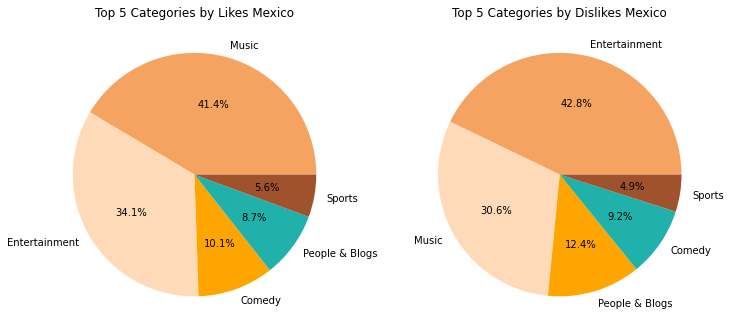

In [55]:

data_likes = df[df['country']=='Mexico'].groupby('category_id')['likes'].sum().to_frame('sum_likes').sort_values('sum_likes', ascending=False).head(5)

data_dislikes = df[df['country']=='Mexico'].groupby('category_id')['dislikes'].sum().to_frame('sum_dislikes').sort_values('sum_dislikes', ascending=False).head(5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
colors = ['sandybrown', 'peachpuff', 'orange', 'lightseagreen', 'sienna', 'chocolate']

ax1.pie(data_likes['sum_likes'], labels=data_likes.index, autopct='%1.1f%%', colors=colors)
ax1.set_title('Top 5 Categories by Likes Mexico')

ax2.pie(data_dislikes['sum_dislikes'], labels=data_dislikes.index, autopct='%1.1f%%', colors=colors)
ax2.set_title('Top 5 Categories by Dislikes Mexico')

plt.show()


In Mexico, people mostly like/dislike Entertainment and Music categories.

In [59]:
data = df[df['country']=='Great_Britain'].groupby('category_id')['dislikes'].sum().to_frame('sum_dislikes').sort_values('sum_dislikes', ascending=False).head(5)

Text(0.5, 1.0, 'Top 5 Categories by Dislikes Great Britain')

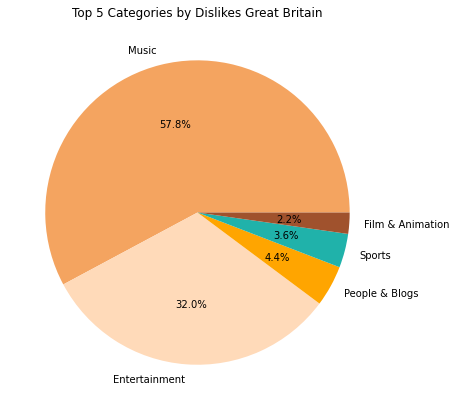

In [60]:
fig, ax = plt.subplots(figsize=(7, 7))
colors = ['sandybrown', 'peachpuff', 'orange', 'lightseagreen', 'sienna', 'chocolate']
plt.pie(data['sum_dislikes'], labels=data.index, autopct='%1.1f%%', colors=colors)
plt.title('Top 5 Categories by Dislikes Great Britain')

And the English are very picky about musical performers.

Let's see what people liked in 2017. Was politics really not very interesting?

In [68]:
category = ['Music', 'News & Politics']
likes = df[df['category_id'].isin(category)].groupby(['category_id'])['likes'].sum().to_frame()

In [69]:
likes

,likes
category_id,
Music,6949884193
News & Politics,154201936


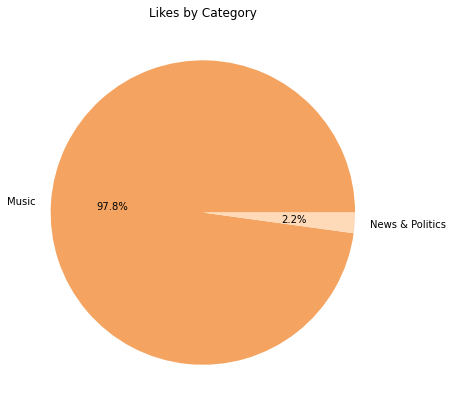

In [70]:

fig, ax = plt.subplots(figsize=(7, 7))

category = ['Music', 'News & Politics']
likes = df[df['category_id'].isin(category)].groupby(['category_id'])['likes'].sum().to_frame()
colors = ['sandybrown', 'peachpuff']

plt.pie(likes['likes'], labels=likes.index, autopct='%1.1f%%',colors=colors)

plt.title('Likes by Category')

plt.show()


So I can say that the News & Politics category was not a very popular topic in 2017.

In [72]:
top_10_likes = df.groupby(['category_id'])['likes'].sum().to_frame('sum_likes').reset_index().sort_values('sum_likes', ascending = False).head(10)

In [78]:
top_10_likes

,category_id,sum_likes
9,Music,6949884193
5,Entertainment,2739500031
3,Comedy,950587200
12,People & Blogs,663623256
6,Film & Animation,565254168
16,Sports,355666183
8,Howto & Style,331818662
7,Gaming,275834959
14,Science & Technology,234057296
10,News & Politics,154201936


[Text(0.5, 1.0, 'Top 10  categories by the number of likes '),
 Text(0.5, 0, 'Total likes'),
 Text(0, 0.5, 'Category')]

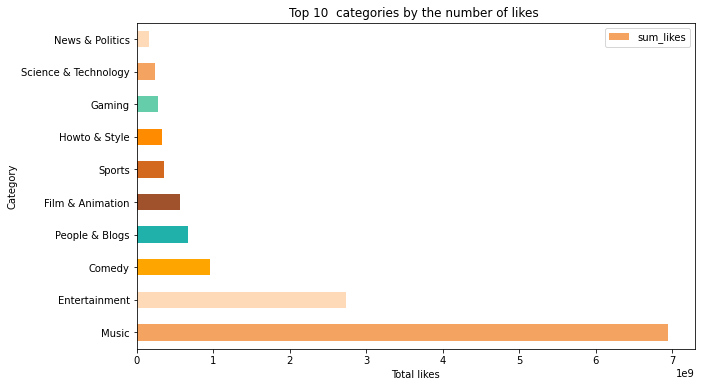

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['sandybrown','peachpuff','orange','lightseagreen', 'sienna', 'chocolate', 'darkorange', 'mediumaquamarine']
top_10.plot(kind='barh', y="sum_likes", x="category_id", ax=ax,color=colors)

ax.set(title='Top 10  categories by the number of likes ', xlabel='Total likes', ylabel='Category')

It was also interesting to see the top 10 categories by the number of likes. I was surprised that the Education category did not make the list. And Science and Technology is in the last place.

## Task 3
Channels that are popular in most countries. Ed Sheeran hi.

In [1]:
Ed_Sheeran = df[df['channel_title']== 'Ed Sheeran'].groupby('country')['views'].sum().head(5)

NameError: name 'df' is not defined

In [85]:
Ed_Sheeran

country
Canada            385566686
Germany           205159549
Great_Britain    3589056783
India             257307762
Japan              12721269
Name: views, dtype: int64

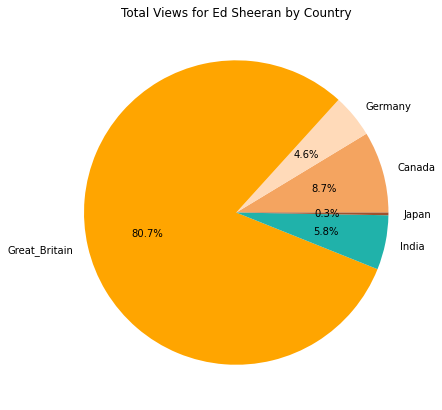

In [86]:
labels = Ed_Sheeran.index.tolist()
values = Ed_Sheeran.values.tolist()

fig, ax = plt.subplots(figsize=(7, 7))
my_colors = ['sandybrown','peachpuff','orange','lightseagreen', 'sienna', 'chocolate', 'darkorange', 'mediumaquamarine']
ax.pie(values, labels=labels, autopct='%1.1f%%',colors=my_colors)
ax.set_title('Total Views for Ed Sheeran by Country')

plt.show()

Ed Sheeran is loved the most in Great Britain. Other countries are practically indifferent to his work. In Canada about 9% views and in Germany and India about 5-6%.

In [93]:
top_10_channel = df.groupby(['channel_title'])['views'].sum().to_frame('sum_views').sort_values('sum_views', ascending = False).head(10).reset_index()

In [96]:
top_10_channel 

,channel_title,sum_views
0,ChildishGambinoVEVO,10863001444
1,Marvel Entertainment,10207246975
2,NickyJamTV,9363824936
3,Ozuna,8606723117
4,ibighit,7913804089
5,DrakeVEVO,7557827306
6,Bad Bunny,7120372765
7,ArianaGrandeVevo,6126944204
8,jypentertainment,5751095939
9,Ed Sheeran,5628102380


Let's look at the most popular channels in the countries of our analysis.

[Text(0.5, 1.0, 'Top 10 most popular channels  '),
 Text(0.5, 0, 'Total Views'),
 Text(0, 0.5, 'Channel')]

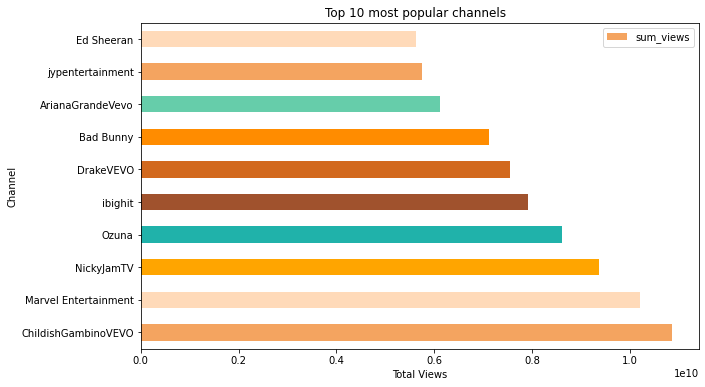

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['sandybrown','peachpuff','orange','lightseagreen', 'sienna', 'chocolate', 'darkorange', 'mediumaquamarine']
top_10_channel.plot(kind='barh', y="sum_views", x="channel_title", ax=ax,color=colors)

ax.set(title='Top 10 most popular channels  ', xlabel='Total Views', ylabel='Channel')

ChildishGambinoVEVO was actually a very popular channel with viewers. Ed_Sheeran's TOP 10 in the last round.